> Your very first Neural Network model using Tensorflow! You are going to learn how to model a simple line y = m x + b and use it to predict the values of y given x values.

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
import sys
%matplotlib inline
# inline表示将图表嵌入到Notebook中

In [2]:
%magic

In [3]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Tensorflow version 1.1.0
Pandas version 0.20.3
Numpy version 1.12.1


# Create Training Data  

    y = m * x + b  

* We are going to call our ***x*** variable, ***train_x***  
* We are going to call our ***y*** variable, ***train_y***

In [4]:
# generate 100 random samples
train_x = np.random.rand(100).astype(np.float)

In [5]:
# compute train_y
train_y = 0.2*train_x + 5

Let us pause for a second....

What have you done thus far? You have simply created your training data that you are going to use to train your model. You will shortly be feeding in train_x to your model and ask it to predict what train_y should be. Your model needs to figure out what the values for m and b need to be in order be correct in its prediction. You already know the answer (m=0.1, b=0.3) but your job is to train your model to come up with the correct answer.

> Plot the Data so you know what you are working with

In [6]:
df = pd.DataFrame({
    'x':train_x,
    'y':train_y
})
df.head()

,x,y
0,0.023450,5.004690
1,0.619691,5.123938
2,0.603601,5.120720
3,0.458135,5.091627
4,0.748540,5.149708


In [7]:
df.describe()

,x,y
count,100.000000,100.000000
mean,0.519583,5.103917
std,0.293722,0.058744
min,0.003634,5.000727
25%,0.251828,5.050366
50%,0.511767,5.102353
75%,0.765625,5.153125
max,0.997956,5.199591


This is not a very exciting chart, but you can clearly see this is just a straight line. We could have added some noise to the data but I am trying to make this lesson as simple as possible.

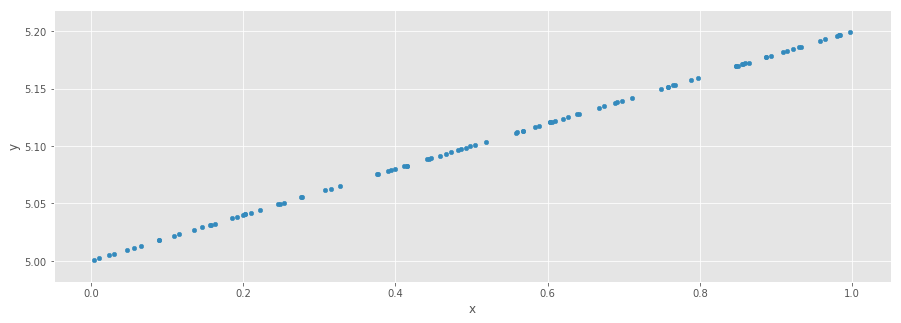

In [8]:
df.plot.scatter(x='x',y='y',figsize=(15,5))
# scatter:散点图，figsize指定宽度和高度

# Create Test Data
This is the data that you are going to use to verify that your model actually works. The test data should be data that your model has not seen before. In other words your training data should be different than your test data.

In [9]:
test_x = np.random.rand(100).astype(np.float32)

# Model your Graph

> IMPORTANT functions/parameters to play with  

* ***loss*** - There are various functions you can choose to measure the ***error*** between ***train_y*** (your training data) and ***pred*** (your models predicted value)  
* ***GradientDescentOptimizer(LEARNING_RATE)*** - Modify this number to see how your results change

### Variables  

In the previous lessons, you have just defined constants and placeholders. In this lesson you are introducing Variables to the mix.  

When your model runs it will initialize your variables ***W*** and ***b***. On every training iteration it will adjust the values for variables ***W*** and ***b***. For this to occur, you need to define ***W*** and ***b*** as variables.  

* ***Constants*** - Values created before you run our model that do not change.
* ***Placeholders*** - Values that are fed into your model at run time.
* ***Variables*** - Values that are modified at run time by your model.  
* ***W*** - Weights for your output layer.  
* ***b*** - Biases for your output layer.  

In [15]:
# placeholders
x = tf.placeholder(tf.float32,name='01_x')
y = tf.placeholder(tf.float32,name='01_y')

# variables
# Note that np.random.rand() is used to initialize your variables
# np.random.rand() 作用是初始化
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = tf.multiply(W,x) + b

# minimize the mean square errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(pred-y))

# we pick out our optimizer and a learning rate
optimizer = tf.train.GradientDescentOptimizer(0.7)

# we train our model by minimize our loss function
train = optimizer.minimize(loss)

# Time to Train!

> When working with Variables you must initialize them with some default values, ***tf.global_variables_initializer()*** does that for you.

You are going to train your model 200 times and see if we can create a model that can accurately predict. Play around with the number of training rounds, the Learning Rate, and see how this changes your results.

In [18]:
# init the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)
    
    #fit the function
    for step in range(200):
        #get your data
        train_data = {x:train_x, y:train_y}
        
        sess.run(train,feed_dict=train_data)
        
        if step%10 == 0:
            print(step,sess.run(W),sess.run(b))
            
    # note that W and b match the line we are tying to model (y = w*x + b)
    print("Train complete,W =",sess.run(W)," b =",sess.run(b))
    
    #run your trained model on your test data
    test_result = sess.run(pred,feed_dict={x:test_x})
    
    df_final = pd.DataFrame({'test_x':test_x,'pred':test_result})


0 3.80942 6.99361
10 1.11495 4.94692
20 0.49453 4.88808
30 0.305443 4.94725
40 0.239171 4.97888
50 0.214722 4.99188
60 0.205553 4.99692
70 0.202097 4.99883
80 0.200792 4.99956
90 0.200299 4.99983
100 0.200113 4.99994
110 0.200042 4.99998
120 0.200016 4.99999
130 0.200006 5.0
140 0.200002 5.0
150 0.200001 5.0
160 0.200001 5.0
170 0.200001 5.0
180 0.200001 5.0
190 0.200001 5.0
Train complete,W = 0.200001  b = 5.0


# Plot the Training Data vs the Test Data  

As you can see, your NN model is doing very well. You were able to get a line that matches perfectly using data that was not part of the training data set.  

Text(0.5,0,'x')

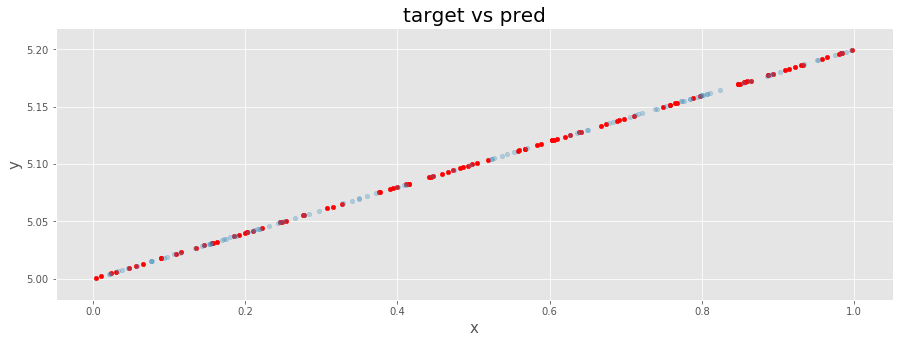

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# chart 1: show the line we are trying to model
df.plot.scatter(x='x',y='y',color='red',ax=axes)

# chart 2: show the line we trained model came up with
# alpha表示透明度
df_final.plot.scatter(x='test_x',y='pred',ax=axes, alpha=0.3)

# add a litter sugar
axes.set_title('target vs pred',fontsize=20)
axes.set_ylabel('y',fontsize=15)
axes.set_xlabel('x',fontsize=15)

There was a lot of information I ommitted in this lesson but the main point was to get you used to the mechanics of getting a simple NN model working. Don't get stuck in this lesson, your questions will be answered in the next lessons.